# **Train New Model with TCGA pretrained model**

## **Module**

In [1]:
from function import *

/home/km/anaconda3/envs/deepdep/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:469: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/km/anaconda3/envs/deepdep/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:470: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/km/anaconda3/envs/deepdep/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:471: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/km/anaconda3/envs/deepdep/lib/python3.5/site-pack

In [2]:
print(os.getcwd())
os.chdir("/home/km/Dependency_prediction/")
print(os.getcwd())

/home/km/Dependency_prediction/prediction/src
/home/km/Dependency_prediction


## **Data Load & Path**

* **Path**

In [3]:
TRAIN_PATH = "/home/km/Dependency_prediction/preprocessing/DATA/2022-08-18//"
PREMODEL_PATH = "prediction/data/premodel_tcga/"
TEMP_PATH = "prediction/train_preprocessing/"
SAVE_PATH = "prediction/custom_model/" + datetime.datetime.now().strftime("%Y-%m%d") + "/"
CHECK_PATH = SAVE_PATH + "checkpoint/"
NPZ_PATH = 'prediction/data/ccl_complete_data_501CCL_1632DepOI_.npz'
Path(CHECK_PATH).mkdir(parents=True, exist_ok=True)

* **Pretrained Model load - TCGA**

In [4]:
premodel_mut = pickle.load(open(PREMODEL_PATH + 'premodel_tcga_mut_1000_100_50.pickle', 'rb'))
premodel_exp = pickle.load(open(PREMODEL_PATH + 'premodel_tcga_exp_500_200_50.pickle', 'rb'))
premodel_cna = pickle.load(open(PREMODEL_PATH + 'premodel_tcga_cna_500_200_50.pickle', 'rb'))
premodel_meth = pickle.load(open(PREMODEL_PATH + 'premodel_tcga_meth_500_200_50.pickle', 'rb'))
print("\n\nDatasets successfully loaded.")



Datasets successfully loaded.


## **Fit & Evaluation Model**

### **(1) Full Model 4-Omics**

In [ ]:
# data load & train_test split
data_exp, data_mut, data_cna, data_meth, data_fprint, data_dep = trainset_load(npz_path=NPZ_PATH,
                                                                              temp_path=TEMP_PATH, train_path=TRAIN_PATH)
id_train, id_test = train_test_index(index_data=data_mut, num_depoi=1632, split_ratio=0.8)

with tf.device('/cpu:0'):
    K.clear_session()
    model = full_model(data_mut=data_mut, data_exp=data_exp, data_cna=data_cna,data_meth=data_meth,
                      data_fprint=data_fprint, data_dep=data_dep, id_train=id_train, id_test=id_test,
                      premodel_mut=premodel_mut, premodel_exp=premodel_exp, premodel_cna=premodel_cna,
                      premodel_meth=premodel_meth, save_path = CHECK_PATH)

In [ ]:
model_train_vis(history=model[1], save_path=SAVE_PATH, filename="Full")

In [ ]:
# SAVE_NAME = "model_full"
SAVE_NAME = "model_cna-exp-meth-mut"
model[0].save(SAVE_PATH + SAVE_NAME + ".h5")
print("\n\nFull DeepDEP model saved in %s\n\n" % (SAVE_PATH + SAVE_NAME + ".h5"))

### **(2) Expression-Mutation-CNA Model 3-Omics**

In [ ]:
data_exp, data_mut, data_cna, data_meth, data_fprint, data_dep = trainset_load(npz_path=NPZ_PATH,
                                                                               temp_path=TEMP_PATH, train_path=TRAIN_PATH, 
                                                                               meth=False)
id_train, id_test = train_test_index(index_data=data_mut, num_depoi=1632, split_ratio=0.8)

with tf.device('/cpu:0'):
    K.clear_session()
    model = mut_exp_cna_model(data_mut=data_mut, data_exp=data_exp, data_cna=data_cna,
                      data_fprint=data_fprint, data_dep=data_dep, id_train=id_train, id_test=id_test,
                      premodel_mut=premodel_mut, premodel_exp=premodel_exp, premodel_cna=premodel_cna,
                      save_path = CHECK_PATH)

In [ ]:
model_train_vis(history=model[1], save_path=SAVE_PATH, filename="Mut-Exp-CNA")

In [ ]:
# SAVE_NAME = "model_mut_exp_cna"
SAVE_NAME = "model_cna-exp-mut"
model[0].save(SAVE_PATH + SAVE_NAME + ".h5")
print("\n\nMut_Exp_CNA-DeepDEP model saved in %s\n\n" % (SAVE_PATH + SAVE_NAME + ".h5"))

In [ ]:
import os
os._exit(00)

### **(3) Expression-Mutation-Meth Model 3-Omics**

In [5]:
data_exp, data_mut, data_cna, data_meth, data_fprint, data_dep = trainset_load(npz_path=NPZ_PATH,
                                                                               temp_path=TEMP_PATH, train_path=TRAIN_PATH, 
                                                                               cna=False)
id_train, id_test = train_test_index(index_data=data_mut, num_depoi=1632, split_ratio=0.8)

with tf.device('/cpu:0'):
    K.clear_session()
    model = mut_exp_meth_model(data_mut=data_mut, data_exp=data_exp, data_meth=data_meth,
                      data_fprint=data_fprint, data_dep=data_dep, id_train=id_train, id_test=id_test,
                      premodel_mut=premodel_mut, premodel_exp=premodel_exp, premodel_meth=premodel_meth,
                      save_path = CHECK_PATH)



Training/validation on 654432 samples (401 CCLs x 1632 DepOIs) and testing on 163200 samples (100 CCLs x 1632 DepOIs).


Train on 509002 samples, validate on 145430 samples
Epoch 1/30
509002/509002 [==============================] - 342s - loss: 0.0797 - val_loss: 0.1050
Epoch 2/30
509002/509002 [==============================] - 336s - loss: 0.0588 - val_loss: 0.0752
Epoch 3/30
509002/509002 [==============================] - 333s - loss: 0.0562 - val_loss: 0.0788
Epoch 4/30
509002/509002 [==============================] - 338s - loss: 0.0544 - val_loss: 0.0609
Epoch 5/30
509002/509002 [==============================] - 327s - loss: 0.0526 - val_loss: 0.0622
Epoch 6/30
509002/509002 [==============================] - 333s - loss: 0.0515 - val_loss: 0.0677
Epoch 7/30
509002/509002 [==============================] - 328s - loss: 0.0508 - val_loss: 0.0763
Epoch 8/30
509002/509002 [==============================] - 326s - loss: 0.0502 - val_loss: 0.0676
Epoch 00007: early stopping


Mut

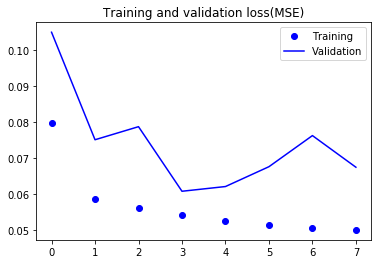

In [6]:
model_train_vis(history=model[1], save_path=SAVE_PATH, filename="Mut-Exp-Meth")

In [7]:
# SAVE_NAME = "model_mut_exp_meth"
SAVE_NAME = "model_exp-meth-mut"
model[0].save(SAVE_PATH + SAVE_NAME + ".h5")
print("\n\nMut_Exp_Meth-DeepDEP model saved in %s\n\n" % (SAVE_PATH + SAVE_NAME + ".h5"))



Mut_Exp_Meth-DeepDEP model saved in prediction/custom_model/2022-0823/model_exp-meth-mut.h5




In [ ]:
import os
os._exit(00)

### **(4) Mutation-CNA-Meth Model 3-Omics**

In [6]:
data_exp, data_mut, data_cna, data_meth, data_fprint, data_dep = trainset_load(npz_path=NPZ_PATH,
                                                                               temp_path=TEMP_PATH, train_path=TRAIN_PATH,
                                                                               exp=False)
id_train, id_test = train_test_index(index_data=data_mut, num_depoi=1632, split_ratio=0.8)

with tf.device('/cpu:0'):
    K.clear_session()
    model = mut_cna_meth_model(data_mut=data_mut, data_cna=data_cna, data_meth=data_meth,
                      data_fprint=data_fprint, data_dep=data_dep, id_train=id_train, id_test=id_test,
                      premodel_mut=premodel_mut, premodel_cna=premodel_cna, premodel_meth=premodel_meth,
                      save_path = CHECK_PATH)



Training/validation on 654432 samples (401 CCLs x 1632 DepOIs) and testing on 163200 samples (100 CCLs x 1632 DepOIs).


Train on 509002 samples, validate on 145430 samples
Epoch 1/30
509002/509002 [==============================] - 338s - loss: 0.2582 - val_loss: 0.0981
Epoch 2/30
509002/509002 [==============================] - 338s - loss: 0.0587 - val_loss: 0.0899
Epoch 3/30
509002/509002 [==============================] - 341s - loss: 0.0559 - val_loss: 0.0702
Epoch 4/30
509002/509002 [==============================] - 345s - loss: 0.0548 - val_loss: 0.0764
Epoch 5/30
509002/509002 [==============================] - 341s - loss: 0.0540 - val_loss: 0.0902
Epoch 6/30
509002/509002 [==============================] - 342s - loss: 0.0532 - val_loss: 0.0720
Epoch 7/30
509002/509002 [==============================] - 341s - loss: 0.0516 - val_loss: 0.0815
Epoch 00006: early stopping


Mut_CNA_Meth-DeepDEP model training completed in 42.7 mins.
loss:0.0516 valloss:0.0815 testloss:0.0629

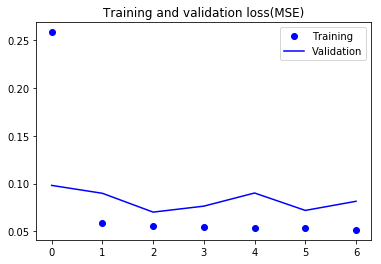

In [7]:
model_train_vis(history=model[1], save_path=SAVE_PATH, filename="Mut-CNA-Meth")

In [8]:
# SAVE_NAME = "model_mut_cna_meth"
SAVE_NAME = "model_cna-meth-mut"
model[0].save(SAVE_PATH + SAVE_NAME + ".h5")
print("\n\nMut_CNA_Meth-DeepDEP model saved in %s\n\n" % (SAVE_PATH + SAVE_NAME + ".h5"))



Mut_CNA_Meth-DeepDEP model saved in prediction/custom_model/2022-0823/model_cna-meth-mut.h5




In [ ]:
import os
os._exit(00)

### **(5) Expression-Mutation Model**

In [5]:
data_exp, data_mut, data_cna, data_meth, data_fprint, data_dep = trainset_load(npz_path=NPZ_PATH,
                                                                               temp_path=TEMP_PATH, train_path=TRAIN_PATH, 
                                                                               cna=False, meth=False)
id_train, id_test = train_test_index(index_data=data_mut, num_depoi=1632, split_ratio=0.8)

with tf.device('/cpu:0'):
    K.clear_session()
    model = mut_exp_model(data_mut=data_mut, data_exp=data_exp, 
                      data_fprint=data_fprint, data_dep=data_dep, id_train=id_train, id_test=id_test,
                      premodel_mut=premodel_mut, premodel_exp=premodel_exp,
                      save_path = CHECK_PATH)



Training/validation on 654432 samples (401 CCLs x 1632 DepOIs) and testing on 163200 samples (100 CCLs x 1632 DepOIs).


Train on 509002 samples, validate on 145430 samples
Epoch 1/30
509002/509002 [==============================] - 263s - loss: 0.0923 - val_loss: 0.0695
Epoch 2/30
509002/509002 [==============================] - 253s - loss: 0.0566 - val_loss: 0.0726
Epoch 3/30
509002/509002 [==============================] - 251s - loss: 0.0540 - val_loss: 0.0746
Epoch 4/30
509002/509002 [==============================] - 252s - loss: 0.0519 - val_loss: 0.1507
Epoch 5/30
509002/509002 [==============================] - 251s - loss: 0.0507 - val_loss: 0.0806
Epoch 00004: early stopping


Mut_Exp-DeepDEP model training completed in 21.9 mins.
loss:0.0507 valloss:0.0806 testloss:0.0660


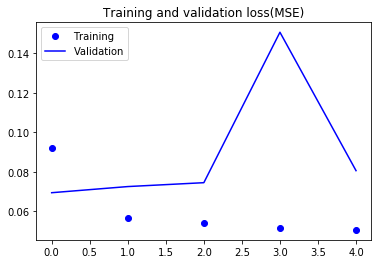

In [6]:
model_train_vis(history=model[1], save_path=SAVE_PATH, filename="Mut-Exp")

In [7]:
# SAVE_NAME = "model_mut_exp"
SAVE_NAME = "model_exp-mut"
model[0].save(SAVE_PATH + SAVE_NAME + ".h5")
print("\n\nMut_CNA-DeepDEP model saved in %s\n\n" % (SAVE_PATH + SAVE_NAME + ".h5"))



Mut_CNA-DeepDEP model saved in prediction/custom_model/2022-0823/model_exp-mut.h5




In [ ]:
import os
os._exit(00)

### **(6) Expression Model**

In [ ]:
data_exp, data_mut, data_cna, data_meth, data_fprint, data_dep = trainset_load(npz_path=NPZ_PATH,
                                                                               temp_path=TEMP_PATH, train_path=TRAIN_PATH,
                                                                               mut=False, cna=False, meth=False)
id_train, id_test = train_test_index(index_data=data_exp, num_depoi=1632, split_ratio=0.8)

with tf.device('/cpu:0'):
    K.clear_session()
    model = exp_model(data_exp=data_exp, data_fprint=data_fprint, data_dep=data_dep, 
                      id_train=id_train, id_test=id_test, premodel_exp=premodel_exp,
                      save_path = CHECK_PATH)

In [ ]:
model_train_vis(history=model[1], save_path=SAVE_PATH, filename="Exp")

In [ ]:
SAVE_NAME = "model_exp"
model[0].save(SAVE_PATH + SAVE_NAME + ".h5")
print("\n\Exp-DeepDEP model saved in %s\n\n" % (SAVE_PATH + SAVE_NAME + ".h5"))

### **(7) Mutation Model**

In [ ]:
data_exp, data_mut, data_cna, data_meth, data_fprint, data_dep = trainset_load(npz_path=NPZ_PATH,
                                                                               temp_path=TEMP_PATH, train_path=TRAIN_PATH,
                                                                               exp=False, cna=False, meth=False)
id_train, id_test = train_test_index(index_data=data_mut, num_depoi=1632, split_ratio=0.8)

with tf.device('/cpu:0'):
    K.clear_session()
    model = mut_model(data_mut=data_mut, data_fprint=data_fprint, data_dep=data_dep, 
                      id_train=id_train, id_test=id_test, premodel_mut=premodel_mut,
                      save_path = CHECK_PATH)

In [ ]:
model_train_vis(history=model[1], save_path=SAVE_PATH, filename="Mut")

In [ ]:
SAVE_NAME = "model_mut"
model[0].save(SAVE_PATH + SAVE_NAME + ".h5")
print("\n\nFull DeepDEP model saved in %s\n\n" % (SAVE_PATH + SAVE_NAME + ".h5"))

### **(8) CNA Model**

In [ ]:
data_exp, data_mut, data_cna, data_meth, data_fprint, data_dep = trainset_load(npz_path=NPZ_PATH,
                                                                               temp_path=TEMP_PATH, train_path=TRAIN_PATH, 
                                                                               mut=False, exp=False, meth=False)
id_train, id_test = train_test_index(index_data=data_cn, num_depoi=1632, split_ratio=0.8)

with tf.device('/cpu:0'):
    K.clear_session()
    model = cna_model(data_cna=data_cna, data_fprint=data_fprint, data_dep=data_dep, 
                      id_train=id_train, id_test=id_test, premodel_cna=premodel_cna,
                      save_path = CHECK_PATH)

In [ ]:
model_train_vis(history=model[1], save_path=SAVE_PATH, filename="CNA")

In [ ]:
SAVE_NAME = "model_cna"
model[0].save(SAVE_PATH + SAVE_NAME + ".h5")
print("\n\CNA DeepDEP model saved in %s\n\n" % (SAVE_PATH + SAVE_NAME + ".h5"))

### **(9) Meth Model**

In [ ]:
data_exp, data_mut, data_cna, data_meth, data_fprint, data_dep = trainset_load(npz_path=NPZ_PATH,
                                                                               temp_path=TEMP_PATH, train_path=TRAIN_PATH, 
                                                                               mut=False, cna=False, exp=False)
id_train, id_test = train_test_index(index_data=data_meth, num_depoi=1632, split_ratio=0.8)

with tf.device('/cpu:0'):
    K.clear_session()
    model = meth_model(data_meth=data_meth, data_fprint=data_fprint, data_dep=data_dep, 
                      id_train=id_train, id_test=id_test, premodel_meth=premodel_meth,
                      save_path = CHECK_PATH)

In [ ]:
model_train_vis(history=model[1], save_path=SAVE_PATH, filename="Meth")

In [ ]:
SAVE_NAME = "model_meth"
model[0].save(SAVE_PATH + SAVE_NAME + ".h5")
print("\n\nMeth DeepDEP model saved in %s\n\n" % (SAVE_PATH + SAVE_NAME + ".h5"))